In [1]:
!source ./bin/activate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ModuleNotFoundError: No module named 'pandas'

In [26]:
url = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"
df = pd.read_csv(url)

In [27]:
#choosing features and labels for regression 
features = ['latitude', 'longitude', 'depth']
label = 'mag' 

In [28]:
#data preprocessing
df = df.dropna(subset=[label])

In [29]:
df 

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,nc,nc75159082,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.230,0.310000,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,ak,ak02549utaqq,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,ak,ak02549uiwrc,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.000,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,ak,ak02549uhsis,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,ci,ci40914991,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.860,0.161000,16.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,2025-03-04T03:25:43.640Z,44.739000,-111.123333,7.15,-0.37,md,7.0,78.0,0.053250,0.11,uu,uu80002863,2025-03-04T22:44:36.140Z,"6 km ESE of Hebgen Lake Estates, Montana",earthquake,0.33,1.410,0.371060,4.0,reviewed,uu,uu
9589,2025-03-04T03:24:58.760Z,37.428500,-119.018500,3.69,1.70,md,28.0,91.0,0.071980,0.06,nc,nc75142456,2025-03-13T10:22:17.234Z,"23 km SSW of Mammoth Lakes, CA",earthquake,0.27,1.030,0.118000,21.0,reviewed,nc,nc
9590,2025-03-04T03:22:28.320Z,44.726000,-111.120667,2.38,-0.92,md,4.0,143.0,0.070890,0.03,uu,uu80002868,2025-03-04T22:44:30.960Z,"7 km N of West Yellowstone, Montana",earthquake,0.29,6.400,0.036038,2.0,reviewed,uu,uu
9591,2025-03-04T03:20:13.493Z,-57.288500,147.327500,10.00,4.50,mb,9.0,171.0,14.395000,0.56,us,us6000pykw,2025-03-27T03:48:33.040Z,west of Macquarie Island,earthquake,13.14,1.998,0.151000,13.0,reviewed,us,us


In [31]:
#doing in features 
for col in features: 
    df[col] = df[col].fillna(df[col].median())

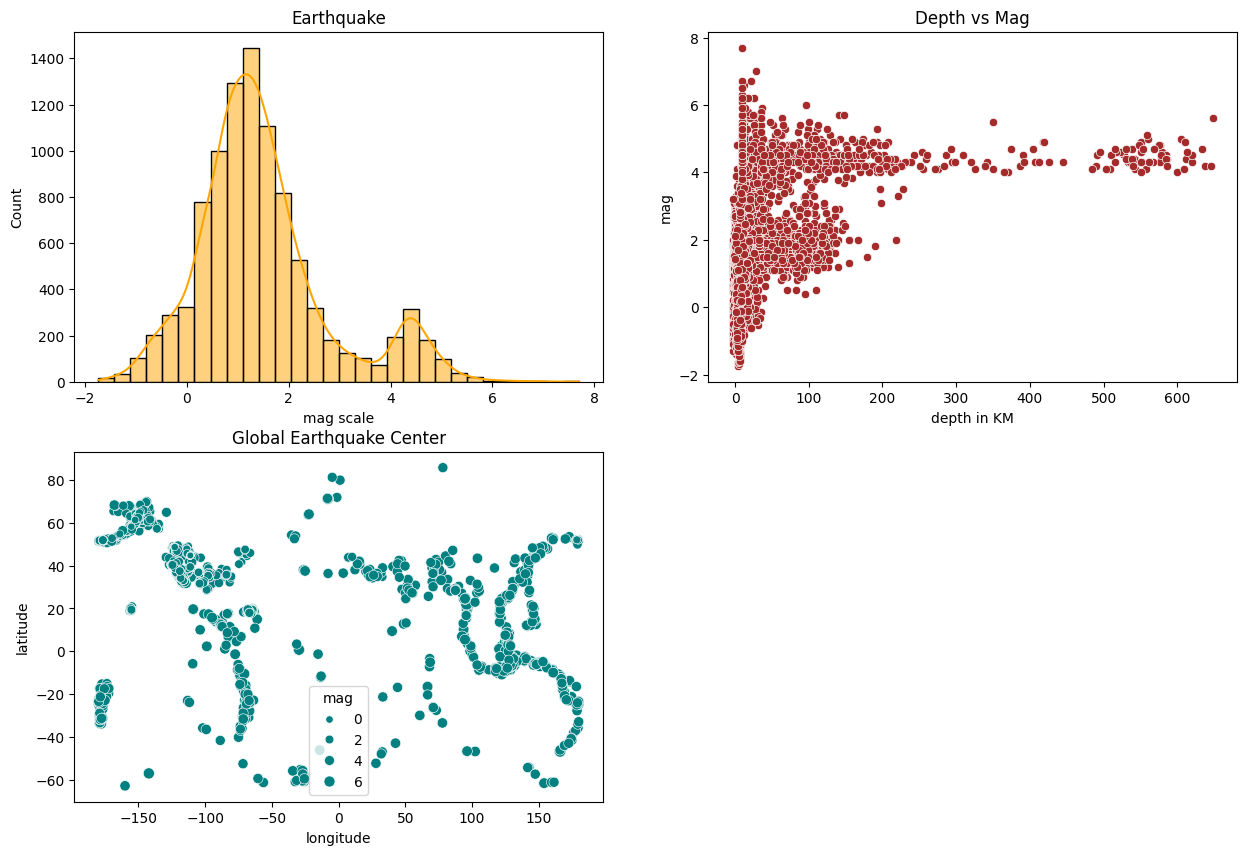

In [32]:
#some basic visuals for data analysis 
plt.figure(figsize=(15,10))

#first plot 
plt.subplot(2,2,1)
plt.title("Earthquake")
plt.xlabel("mag scale")
sb.histplot(df[label],kde=True,bins=30, color="orange") 
#second plot 
plt.subplot(2,2,2) 
plt.title("Depth vs Mag")
plt.xlabel("depth in KM")
sb.scatterplot(x='depth', y=label,data=df, color="brown")

#third plot locations
plt.subplot(2,2,3) 
plt.title("Global Earthquake Center")
plt.xlabel("longitude")
plt.ylabel('latitude')
sb.scatterplot(x='longitude', y="latitude",size=label, data=df, color="teal")

plt.show()

In [33]:
#getting features and label 
feature_data = df[features] 
label_data =  df[label] 


In [34]:
#split and train 
train_ft, test_ft, train_lb, test_lb = train_test_split(feature_data,label_data, test_size = 0.2, random_state=100)

In [35]:
model = RandomForestRegressor() 

In [36]:
trained_model = model.fit(train_ft,train_lb)

In [37]:
print("actual Mag : values", test_lb)

actual Mag : values 8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [38]:
predicted_mag = trained_model.predict(test_ft)
print(predicted_mag)

[0.9021 1.5608 0.0587 ... 1.6267 1.211  0.9679]


In [39]:
print(test_lb) 

8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [40]:
#doing model eval using MSE
error = mean_squared_error(test_lb, predicted_mag)
print("error", error)

error 0.23711714382039525


In [41]:
#only till 4 points 
print(f"Model MSE : {error:.4f}")

Model MSE : 0.2371
